<a href="https://colab.research.google.com/github/Jayalakshmi-27-05/Bioinformatics_lab/blob/main/1RV23BT031_Metagenomic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generated OTU Table (First 5 Rows) ---
           Sample_A  Sample_B  Sample_C  Sample_D
Species_1        51        92        14        71
Species_2        60        20        82        86
Species_3        74        74        87        99
Species_4        23         2        21        52
Species_5         1        87        29        37


--- Alpha Diversity (Shannon Index) ---
Sample_A    3.099134
Sample_B    3.239619
Sample_C    3.194194
Sample_D    3.194816
dtype: float64




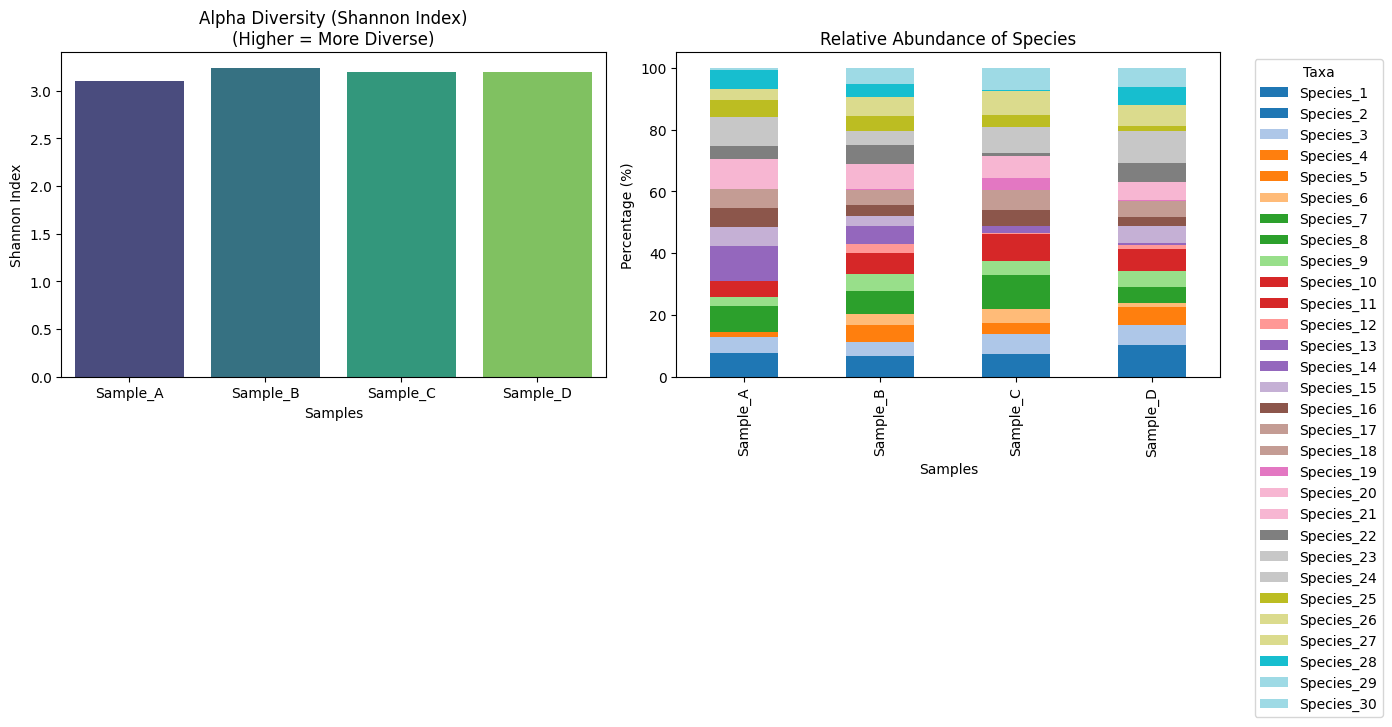

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---------------------------------------------------------
# 1. Data Simulation (Creating a Mock OTU Table)
# ---------------------------------------------------------
# In a real scenario, this data would come from a CSV file generated
# by a sequencing pipeline (e.g., QIIME2, Mothur).
np.random.seed(42)
taxa = [f"Species_{i}" for i in range(1, 31)] # 10 different species
samples = ['Sample_A', 'Sample_B', 'Sample_C', 'Sample_D'] # 4 samples

# Generate random counts (reads) for each species in each sample
data = np.random.randint(0, 100, size=(30, 4))
df = pd.DataFrame(data, index=taxa, columns=samples)

print("--- Generated OTU Table (First 5 Rows) ---")
print(df.head())
print("\n")

# ---------------------------------------------------------
# 2. Alpha Diversity Analysis (Shannon Index)
# ---------------------------------------------------------
# Formula: H = -sum(p_i * ln(p_i))
def calculate_shannon_index(counts):
    total = sum(counts)
    if total == 0: return 0
    proportions = counts / total
    # Filter out zeros to avoid log(0) error
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

alpha_diversity = df.apply(calculate_shannon_index)

print("--- Alpha Diversity (Shannon Index) ---")
print(alpha_diversity)
print("\n")

# ---------------------------------------------------------
# 3. Relative Abundance Calculation
# ---------------------------------------------------------
# Normalize raw counts to percentages (sum of column = 100%)
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot 1: Alpha Diversity
plt.subplot(1, 2, 1)
sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, hue=alpha_diversity.index, palette='viridis', legend=False)
plt.title('Alpha Diversity (Shannon Index)\n(Higher = More Diverse)')
plt.ylabel('Shannon Index')
plt.xlabel('Samples')

# Plot 2: Stacked Bar Chart of Relative Abundance
plt.subplot(1, 2, 2)
# We plot the transpose (.T) so samples are on the X-axis
relative_abundance.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Relative Abundance of Species')
plt.ylabel('Percentage (%)')
plt.xlabel('Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Taxa")

plt.tight_layout()
plt.show()

# Task
Fix the `ValueError` in the provided code by ensuring the `data` array's shape matches the `taxa` and `samples` lists, specifically by changing the size of the `data` array from `(10, 4)` to `(30, 4)` to match the length of the `taxa` list.

## Fix data array shape

### Subtask:
Modify the `np.random.randint` call to generate a data array with the correct shape to match the number of `taxa`.


**Reasoning**:
The previous code failed because the shape of the `data` array did not match the length of the `taxa` list, causing a `ValueError` during DataFrame creation. I need to modify the `np.random.randint` call to correctly size the data array based on the `taxa` and `samples` lists, then regenerate the full code block.



--- Generated OTU Table (First 5 Rows) ---
           Sample_A  Sample_B  Sample_C  Sample_D
Species_1        51        92        14        71
Species_2        60        20        82        86
Species_3        74        74        87        99
Species_4        23         2        21        52
Species_5         1        87        29        37


--- Alpha Diversity (Shannon Index) ---
Sample_A    3.099134
Sample_B    3.239619
Sample_C    3.194194
Sample_D    3.194816
dtype: float64




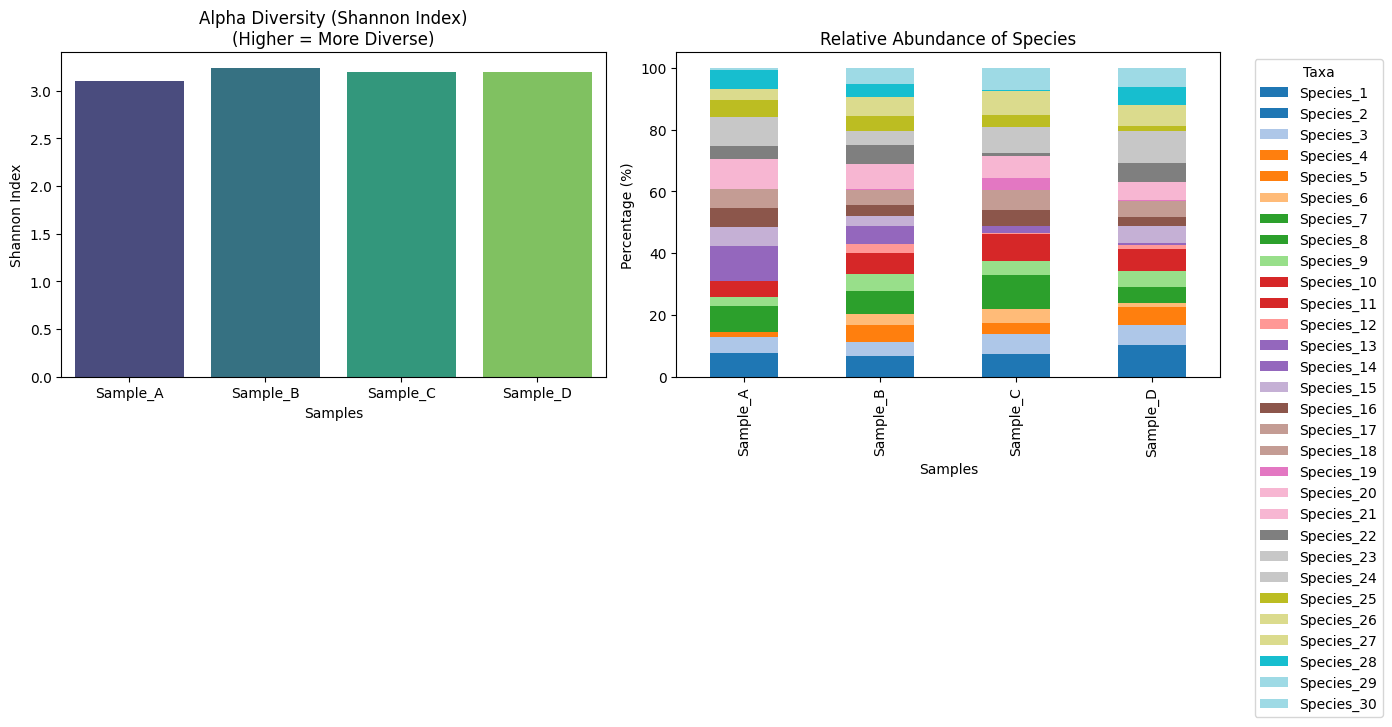

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---------------------------------------------------------
# 1. Data Simulation (Creating a Mock OTU Table)
# ---------------------------------------------------------
# In a real scenario, this data would come from a CSV file generated
# by a sequencing pipeline (e.g., QIIME2, Mothur).
np.random.seed(42)
taxa = [f"Species_{i}" for i in range(1, 31)] # 30 different species
samples = ['Sample_A', 'Sample_B', 'Sample_C', 'Sample_D'] # 4 samples

# Generate random counts (reads) for each species in each sample
data = np.random.randint(0, 100, size=(len(taxa), len(samples)))
df = pd.DataFrame(data, index=taxa, columns=samples)

print("--- Generated OTU Table (First 5 Rows) ---")
print(df.head())
print("\n")

# ---------------------------------------------------------
# 2. Alpha Diversity Analysis (Shannon Index)
# ---------------------------------------------------------
# Formula: H = -sum(p_i * ln(p_i))
def calculate_shannon_index(counts):
    total = sum(counts)
    if total == 0: return 0
    proportions = counts / total
    # Filter out zeros to avoid log(0) error
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

alpha_diversity = df.apply(calculate_shannon_index)

print("--- Alpha Diversity (Shannon Index) ---")
print(alpha_diversity)
print("\n")

# ---------------------------------------------------------
# 3. Relative Abundance Calculation
# ---------------------------------------------------------
# Normalize raw counts to percentages (sum of column = 100%)
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot 1: Alpha Diversity
plt.subplot(1, 2, 1)
sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, hue=alpha_diversity.index, palette='viridis', legend=False)
plt.title('Alpha Diversity (Shannon Index)\n(Higher = More Diverse)')
plt.ylabel('Shannon Index')
plt.xlabel('Samples')

# Plot 2: Stacked Bar Chart of Relative Abundance
plt.subplot(1, 2, 2)
# We plot the transpose (.T) so samples are on the X-axis
relative_abundance.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Relative Abundance of Species')
plt.ylabel('Percentage (%)')
plt.xlabel('Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Taxa")

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   The `ValueError` related to mismatched data array shape was successfully resolved by dynamically adjusting the `size` parameter in `np.random.randint` to `(len(taxa), len(samples))`.
*   This modification ensured the data array's shape correctly matched the number of species (30) and samples (4), leading to a `(30, 4)` array, rather than the previous `(10, 4)`.
*   The OTU (Operational Taxonomic Unit) table was successfully generated, and subsequent calculations for alpha diversity (Shannon Index) and relative abundance proceeded without errors.
*   All intended visualizations, including the alpha diversity bar plot and the stacked bar chart for relative abundance, were successfully generated and displayed.

### Insights or Next Steps
*   Dynamically sizing data arrays based on input parameters (like `len(taxa)` or `len(samples)`) is a robust practice to prevent dimension-related errors and improve code flexibility.
*   For real-world applications, consider integrating actual sequencing data inputs and implementing more sophisticated diversity metrics or statistical analyses.
